In [1]:
!pip install pandas numpy scipy pymysql sqlalchemy matplotlib
!pip install ipython-sql

In [2]:
from sqlalchemy.engine import create_engine
import sqlite3
from pandas.io import sql
import subprocess
%load_ext sql

In [3]:
%sql sqlite:///myfirstdb.db

In [2]:
import pandas as pd
df = pd.read_csv("2023_nsphourly.csv", parse_dates=["datetime"])
print(df.head())

   hour_index            datetime  load_MW
0           1 2023-01-01 01:00:00  1146.88
1           2 2023-01-01 02:00:00  1104.93
2           3 2023-01-01 03:00:00  1074.67
3           4 2023-01-01 04:00:00   990.17
4           5 2023-01-01 05:00:00   985.61


In [3]:
df2024 = pd.read_csv("2024_nsphourly.csv", parse_dates=["datetime"])
print(df2024.head())

   hour_index            datetime  load_MW
0           1 2024-01-01 01:00:00  1472.10
1           2 2024-01-01 02:00:00  1446.02
2           3 2024-01-01 03:00:00  1421.85
3           4 2024-01-01 04:00:00  1408.93
4           5 2024-01-01 05:00:00  1408.98


In [5]:
import datetime
#time = datetime.datetime.strptime(df.datetime[0], '%m/%d/%Y %H:%M')
#time2 = datetime.datetime.strftime(time, '%Y-%m-%d %H:%M')

In [6]:
#time2

In [7]:
#df.datetime.strptime(df.datetime[0], '%m/%d/%Y %H:%M')

In [8]:
#df['datetime'].dt.strftime('%m/%d/%Y %H:%M')
#df['datetime'] = df['datetime'].dt.strftime('%Y-%m-%dT%H:%M')

In [9]:
df.head()

,hour_index,datetime,load_MW
0,1,2023-01-01 01:00:00,1146.88
1,2,2023-01-01 02:00:00,1104.93
2,3,2023-01-01 03:00:00,1074.67
3,4,2023-01-01 04:00:00,990.17
4,5,2023-01-01 05:00:00,985.61


In [10]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np; np.random.seed(1)

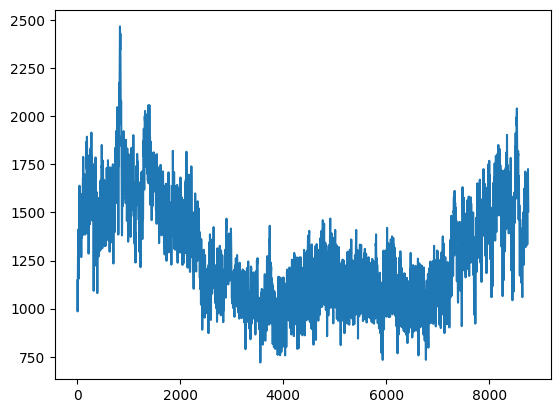

In [11]:
plt.plot(df.index, df['load_MW'])

In [12]:
!pip install calplot

(<Figure size 1250x680 with 5 Axes>,
 array([<Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

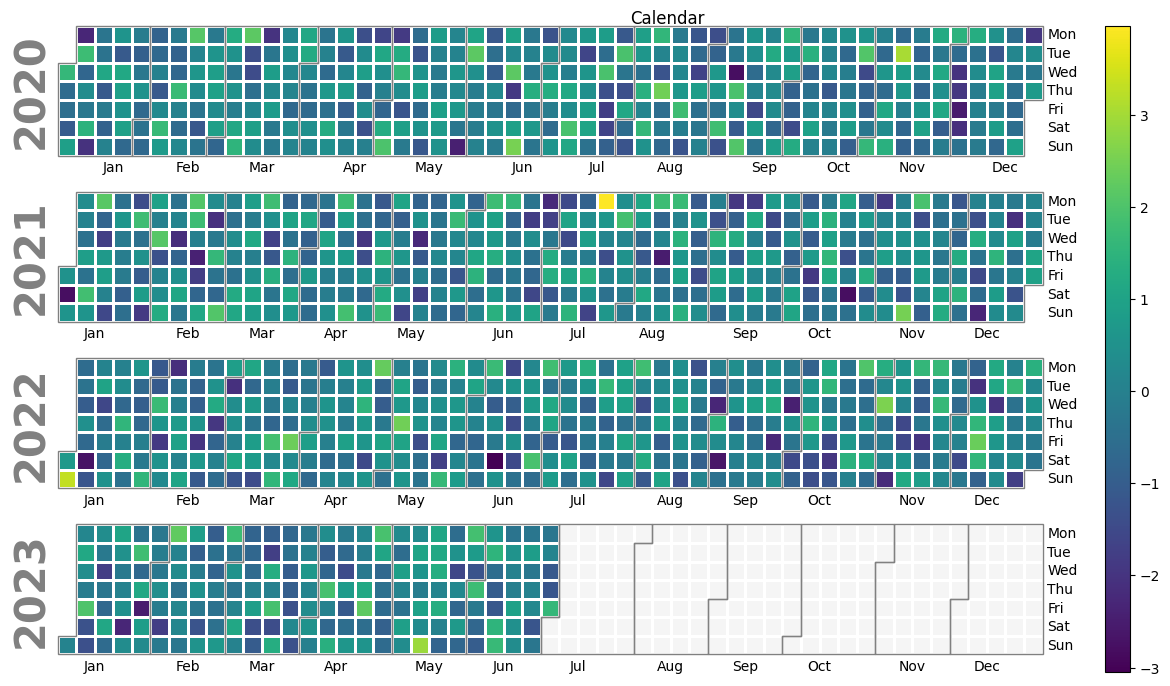

In [13]:
import calplot
# Sequence of dates
days = pd.date_range('01/01/2020', periods = 1277, freq = 'D')

# Pandas time series with random data for each day
values = pd.Series(np.random.randn(len(days)), index = days)

calplot.calplot(values,
                suptitle = 'Calendar',
                suptitle_kws = {'x': 0.5, 'y': 1.0},
                yearlabel_kws={'fontname':'sans-serif'})

In [14]:
# Sequence of dates
#days2 = pd.date_range('01/01/2020', periods = 1277, freq = 'D')

# Pandas time series with random data for each day
#values2 = pd.Series(df['load_MW'], index = df['datetime'].index)

#calplot.calplot(values2,
#                suptitle = 'Calendar',
#                suptitle_kws = {'x': 0.5, 'y': 1.0},
#                yearlabel_kws={'fontname':'sans-serif'})

In [15]:
df = df.set_index('datetime')

In [16]:
df

,hour_index,load_MW
datetime,,
2023-01-01 01:00:00,1,1146.88
2023-01-01 02:00:00,2,1104.93
2023-01-01 03:00:00,3,1074.67
2023-01-01 04:00:00,4,990.17
2023-01-01 05:00:00,5,985.61
...,...,...
2023-12-31 20:00:00,8756,1605.51
2023-12-31 21:00:00,8757,1588.46
2023-12-31 22:00:00,8758,1543.78


In [17]:
#values2 = pd.Series(df['load_MW'], index = df.index)

#calplot.calplot(values2,
#                suptitle = 'Calendar',
#                suptitle_kws = {'x': 0.5, 'y': 1.0},
#                yearlabel_kws={'fontname':'sans-serif'})

In [18]:
df.index = pd.to_datetime(df.index)

(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2023'>], dtype=object))

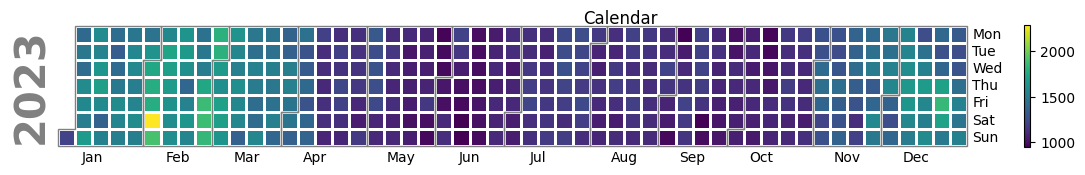

In [19]:
values2 = pd.Series(df['load_MW']/24, index = df.index)

calplot.calplot(values2,
                suptitle = 'Calendar',
                suptitle_kws = {'x': 0.5, 'y': 1.0},
                yearlabel_kws={'fontname':'sans-serif'})

In [20]:
df1 = pd.read_csv("2023_nsphourly.csv", parse_dates=["datetime"])
print(df.head())
df2 = pd.read_csv("2022_nsphourly.csv", parse_dates=["datetime"])
print(df2.head())
df3 = pd.read_csv("2021_nsphourly.csv", parse_dates=["datetime"])
print(df3.head())
df4 = pd.read_csv("2020_nsphourly.csv", parse_dates=["datetime"])
print(df4.head())

                     hour_index  load_MW
datetime                                
2023-01-01 01:00:00           1  1146.88
2023-01-01 02:00:00           2  1104.93
2023-01-01 03:00:00           3  1074.67
2023-01-01 04:00:00           4   990.17
2023-01-01 05:00:00           5   985.61
   hour_index            datetime  load_MW
0           1 2022-01-01 01:00:00  1289.44
1           2 2022-01-01 02:00:00  1297.40
2           3 2022-01-01 03:00:00  1253.83
3           4 2022-01-01 04:00:00  1225.03
4           5 2022-01-01 05:00:00  1215.07
   hour_index            datetime  load_MW
0           1 2021-01-01 01:00:00  1369.58
1           2 2021-01-01 02:00:00  1346.53
2           3 2021-01-01 03:00:00  1313.91
3           4 2021-01-01 04:00:00  1297.92
4           5 2021-01-01 05:00:00  1303.70
   hour_index            datetime  load_MW
0           1 2020-01-01 01:00:00  1347.76
1           2 2020-01-01 02:00:00  1289.02
2           3 2020-01-01 03:00:00  1236.96
3           4 2020-01-01 

In [21]:
df1['datetime'] = df1['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df2['datetime'] = df2['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df3['datetime'] = df3['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df4['datetime'] = df4['datetime'].dt.strftime('%Y-%m-%dT%H:%M')

In [22]:
df1

,hour_index,datetime,load_MW
0,1,2023-01-01T01:00,1146.88
1,2,2023-01-01T02:00,1104.93
2,3,2023-01-01T03:00,1074.67
3,4,2023-01-01T04:00,990.17
4,5,2023-01-01T05:00,985.61
...,...,...,...
8755,8756,2023-12-31T20:00,1605.51
8756,8757,2023-12-31T21:00,1588.46
8757,8758,2023-12-31T22:00,1543.78
8758,8759,2023-12-31T23:00,1539.67


In [23]:
df2

,hour_index,datetime,load_MW
0,1,2022-01-01T01:00,1289.44
1,2,2022-01-01T02:00,1297.40
2,3,2022-01-01T03:00,1253.83
3,4,2022-01-01T04:00,1225.03
4,5,2022-01-01T05:00,1215.07
...,...,...,...
8755,8756,2022-12-31T20:00,1338.02
8756,8757,2022-12-31T21:00,1356.16
8757,8758,2022-12-31T22:00,1313.32
8758,8759,2022-12-31T23:00,1261.48


In [24]:
df3

,hour_index,datetime,load_MW
0,1,2021-01-01T01:00,1369.58
1,2,2021-01-01T02:00,1346.53
2,3,2021-01-01T03:00,1313.91
3,4,2021-01-01T04:00,1297.92
4,5,2021-01-01T05:00,1303.70
...,...,...,...
8755,8756,2021-12-31T20:00,1515.56
8756,8757,2021-12-31T21:00,1442.09
8757,8758,2021-12-31T22:00,1379.25
8758,8759,2021-12-31T23:00,1321.85


In [25]:
df4

,hour_index,datetime,load_MW
0,1,2020-01-01T01:00,1347.76
1,2,2020-01-01T02:00,1289.02
2,3,2020-01-01T03:00,1236.96
3,4,2020-01-01T04:00,1204.66
4,5,2020-01-01T05:00,1192.79
...,...,...,...
8779,8780,2020-12-31T20:00,1463.28
8780,8781,2020-12-31T21:00,1404.85
8781,8782,2020-12-31T22:00,1359.48
8782,8783,2020-12-31T23:00,1369.47


In [26]:
df1.index = pd.to_datetime(df1.index)
df2.index = pd.to_datetime(df2.index)
df3.index = pd.to_datetime(df3.index)
df4.index = pd.to_datetime(df4.index)

In [27]:
#hourly_df.index = pd.to_datetime(hourly_df.index)

In [28]:
hourly_df = pd.concat([df1, df2, df3, df4], ignore_index=True, sort=False)

In [29]:
hourly_df

,hour_index,datetime,load_MW
0,1,2023-01-01T01:00,1146.88
1,2,2023-01-01T02:00,1104.93
2,3,2023-01-01T03:00,1074.67
3,4,2023-01-01T04:00,990.17
4,5,2023-01-01T05:00,985.61
...,...,...,...
35059,8780,2020-12-31T20:00,1463.28
35060,8781,2020-12-31T21:00,1404.85
35061,8782,2020-12-31T22:00,1359.48
35062,8783,2020-12-31T23:00,1369.47


In [30]:
hourly_df.index = pd.to_datetime(hourly_df['datetime'])

In [31]:
hourly_df

,hour_index,datetime,load_MW
datetime,,,
2023-01-01 01:00:00,1,2023-01-01T01:00,1146.88
2023-01-01 02:00:00,2,2023-01-01T02:00,1104.93
2023-01-01 03:00:00,3,2023-01-01T03:00,1074.67
2023-01-01 04:00:00,4,2023-01-01T04:00,990.17
2023-01-01 05:00:00,5,2023-01-01T05:00,985.61
...,...,...,...
2020-12-31 20:00:00,8780,2020-12-31T20:00,1463.28
2020-12-31 21:00:00,8781,2020-12-31T21:00,1404.85
2020-12-31 22:00:00,8782,2020-12-31T22:00,1359.48


(<Figure size 1250x680 with 5 Axes>,
 array([<Axes: ylabel='2023'>, <Axes: ylabel='2022'>,
        <Axes: ylabel='2021'>, <Axes: ylabel='2020'>], dtype=object))

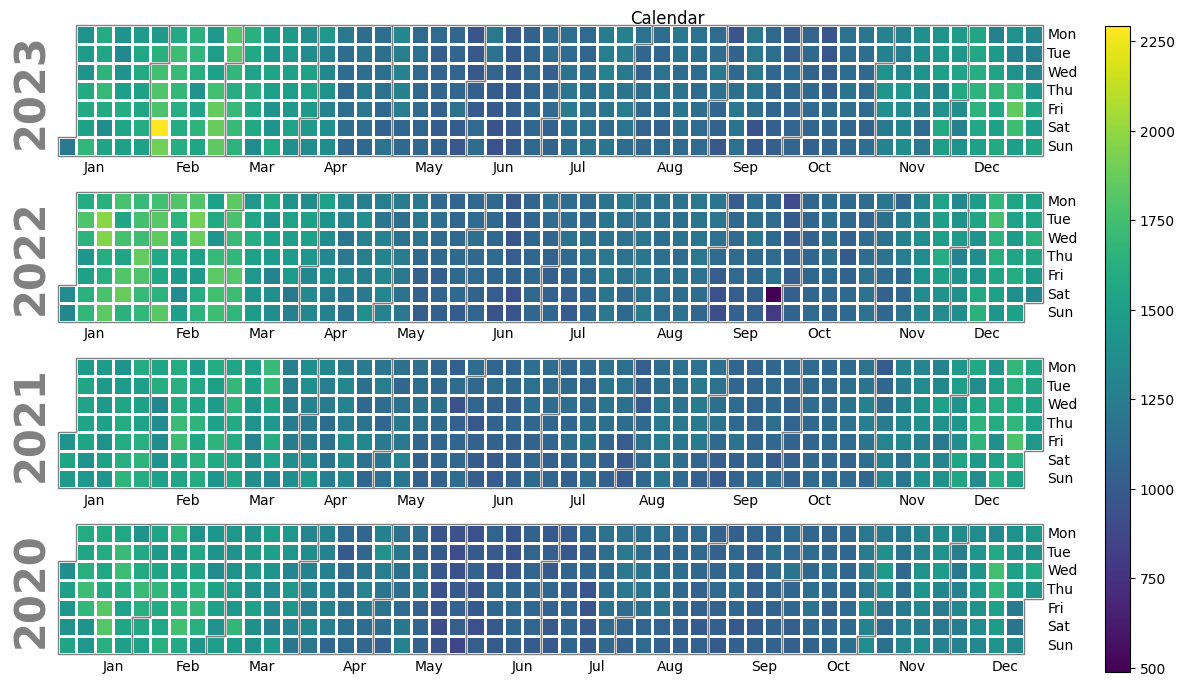

In [32]:
values3 = pd.Series(hourly_df['load_MW']/24, index = hourly_df.index)

calplot.calplot(values3, yearascending= False,
                suptitle = 'Calendar',
                suptitle_kws = {'x': 0.5, 'y': 1.0},
                yearlabel_kws={'fontname':'sans-serif'})

In [33]:
df5 = pd.read_csv("2019_nsphourly.csv", parse_dates=["datetime"])
print(df5.head())
df6 = pd.read_csv("2018_nsphourly.csv", parse_dates=["datetime"])
print(df6.head())
df7 = pd.read_csv("2017_nsphourly.csv", parse_dates=["datetime"])
print(df7.head())
df8 = pd.read_csv("2016_nsphourly.csv", parse_dates=["datetime"])
print(df8.head())
df9 = pd.read_csv("2015_nsphourly.csv", parse_dates=["datetime"])
print(df9.head())
df10 = pd.read_csv("2014_nsphourly.csv", parse_dates=["datetime"])
print(df10.head())
df11 = pd.read_csv("2013_nsphourly.csv", parse_dates=["datetime"])
print(df11.head())
df12 = pd.read_csv("2012_nsphourly.csv", parse_dates=["datetime"])
print(df12.head())
df13 = pd.read_csv("2011_nsphourly.csv", parse_dates=["datetime"])
print(df13.head())
df14 = pd.read_csv("2010_nsphourly.csv", parse_dates=["datetime"])
print(df14.head())
df15 = pd.read_csv("2009_nsphourly.csv", parse_dates=["datetime"])
print(df15.head())
df16 = pd.read_csv("2008_nsphourly.csv", parse_dates=["datetime"])
print(df16.head())
df17 = pd.read_csv("2007_nsphourly.csv", parse_dates=["datetime"])
print(df17.head())

   hour_index            datetime  load_MW
0           1 2019-01-01 01:00:00  1568.04
1           2 2019-01-01 02:00:00  1520.38
2           3 2019-01-01 03:00:00  1464.90
3           4 2019-01-01 04:00:00  1423.46
4           5 2019-01-01 05:00:00  1402.75
   hour_index            datetime  load_MW
0           1 2018-01-01 01:00:00  1573.78
1           2 2018-01-01 02:00:00  1537.95
2           3 2018-01-01 03:00:00  1509.02
3           4 2018-01-01 04:00:00  1495.29
4           5 2018-01-01 05:00:00  1503.70
   hour_index            datetime  load_MW
0           1 2017-01-01 01:00:00     1431
1           2 2017-01-01 02:00:00     1371
2           3 2017-01-01 03:00:00     1317
3           4 2017-01-01 04:00:00     1301
4           5 2017-01-01 05:00:00     1287
   hour_index            datetime  load_MW
0           1 2016-01-01 01:00:00     1157
1           2 2016-01-01 02:00:00     1119
2           3 2016-01-01 03:00:00     1072
3           4 2016-01-01 04:00:00     1032
4          

In [34]:
df5['datetime'] = df5['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df6['datetime'] = df6['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df7['datetime'] = df7['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df8['datetime'] = df8['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df9['datetime'] = df9['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df10['datetime'] = df10['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df11['datetime'] = df11['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df12['datetime'] = df12['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df13['datetime'] = df13['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df14['datetime'] = df14['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df15['datetime'] = df15['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df16['datetime'] = df16['datetime'].dt.strftime('%Y-%m-%dT%H:%M')
df17['datetime'] = df17['datetime'].dt.strftime('%Y-%m-%dT%H:%M')

In [35]:
df5.index = pd.to_datetime(df5.index)
df6.index = pd.to_datetime(df6.index)
df7.index = pd.to_datetime(df7.index)
df8.index = pd.to_datetime(df8.index)
df9.index = pd.to_datetime(df9.index)
df10.index = pd.to_datetime(df10.index)
df11.index = pd.to_datetime(df11.index)
df12.index = pd.to_datetime(df12.index)
df13.index = pd.to_datetime(df13.index)
df14.index = pd.to_datetime(df14.index)
df15.index = pd.to_datetime(df15.index)
df16.index = pd.to_datetime(df16.index)
df17.index = pd.to_datetime(df17.index)

In [36]:
hourly_df2 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17], ignore_index=True, sort=False)

In [37]:
hourly_df2.index = pd.to_datetime(hourly_df2['datetime'])

In [38]:
hourly_df2

,hour_index,datetime,load_MW
datetime,,,
2023-01-01 01:00:00,1,2023-01-01T01:00,1146.88
2023-01-01 02:00:00,2,2023-01-01T02:00,1104.93
2023-01-01 03:00:00,3,2023-01-01T03:00,1074.67
2023-01-01 04:00:00,4,2023-01-01T04:00,990.17
2023-01-01 05:00:00,5,2023-01-01T05:00,985.61
...,...,...,...
2007-12-31 19:00:00,8756,2007-12-31T19:00,1702.00
2007-12-31 20:00:00,8757,2007-12-31T20:00,1607.00
2007-12-31 21:00:00,8758,2007-12-31T21:00,1553.00


In [39]:
#hourly_df2["load_MW"] = hourly_df2["load_MW"].astype(float)
#hourly_df2["load_MW"] = hourly_df2["load_MW"].str.replace(",","").astype(float)

(<Figure size 1250x2890 with 18 Axes>,
 array([<Axes: ylabel='2023'>, <Axes: ylabel='2022'>,
        <Axes: ylabel='2021'>, <Axes: ylabel='2020'>,
        <Axes: ylabel='2019'>, <Axes: ylabel='2018'>,
        <Axes: ylabel='2017'>, <Axes: ylabel='2016'>,
        <Axes: ylabel='2015'>, <Axes: ylabel='2014'>,
        <Axes: ylabel='2013'>, <Axes: ylabel='2012'>,
        <Axes: ylabel='2011'>, <Axes: ylabel='2010'>,
        <Axes: ylabel='2009'>, <Axes: ylabel='2008'>,
        <Axes: ylabel='2007'>], dtype=object))

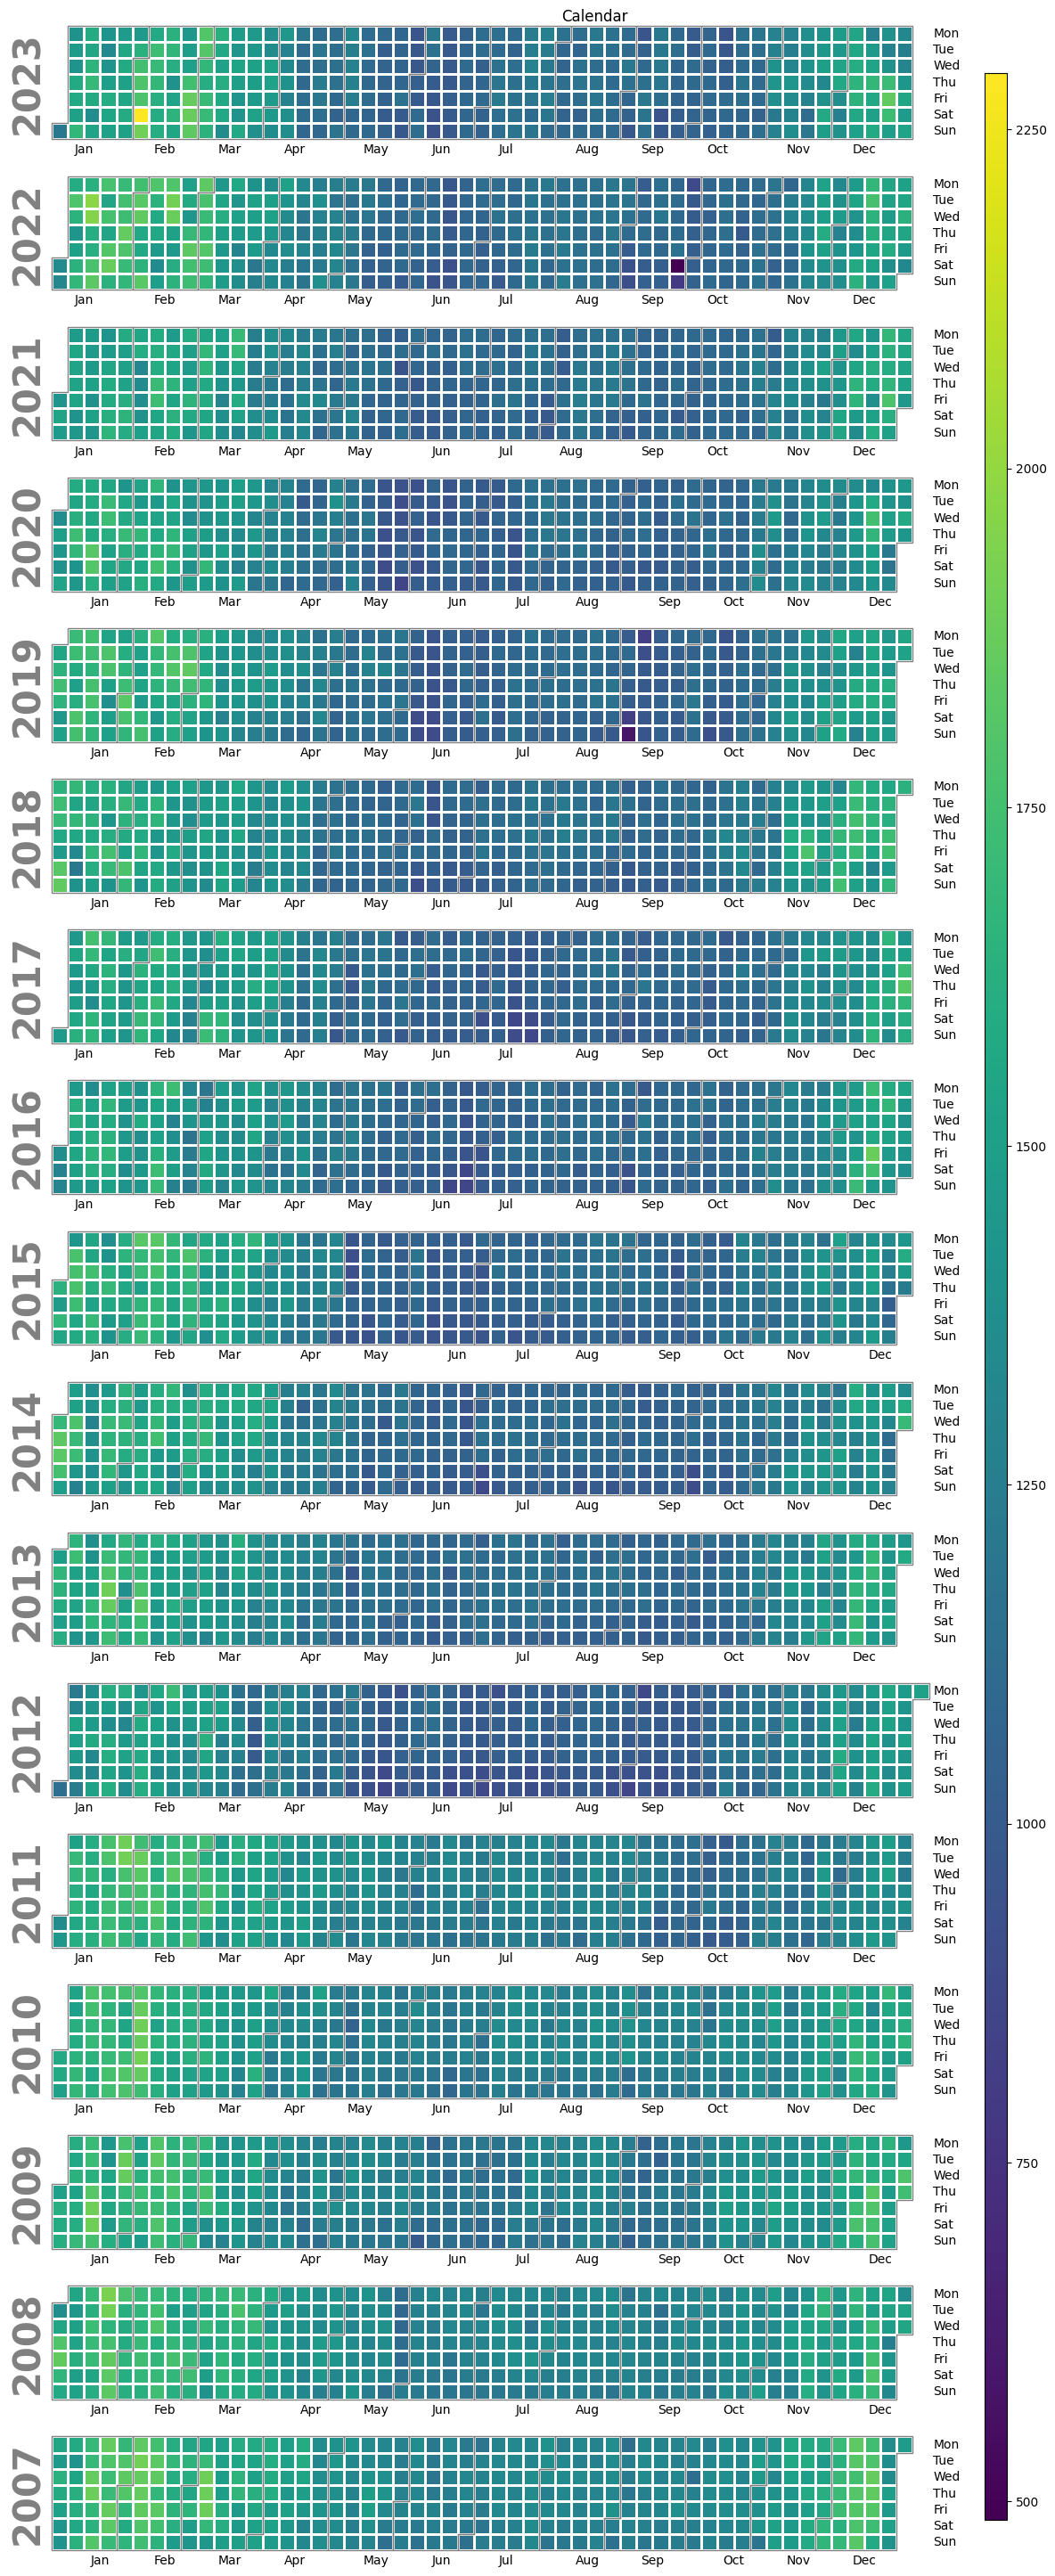

In [40]:
values4 = pd.Series(hourly_df2['load_MW']/24, index = hourly_df2.index)

calplot.calplot(values4, yearascending= False,
                suptitle = 'Calendar',
                suptitle_kws = {'x': 0.5, 'y': 1.0},
                yearlabel_kws={'fontname':'sans-serif'})

In [41]:
hourly_df2.dtypes

hour_index      int64
datetime       object
load_MW       float64
dtype: object

In [42]:
hourly_df2["datetime"] = hourly_df2["datetime"].astype('datetime64[ns]')
#df_year = hourly_df2.groupby(hourly_df2.index.year)

In [43]:
#df_year

In [44]:
#hourly_df2.groupby(hourly_df2['datetime'].map(lambda x: x.year))
summary_df = hourly_df2.groupby(hourly_df2['datetime'].dt.year)['load_MW'].agg(['sum', 'median', 'max', 'min'])
summary_df

,sum,median,max,min
datetime,,,,
2007,12662707.00,1428.000,2156.00,730.00
2008,12499448.00,1417.000,2192.00,858.00
2009,12046199.00,1360.000,2100.00,740.00
2010,12140629.00,1381.000,2121.00,771.00
2011,11823461.00,1344.000,2176.00,741.00
2012,10443788.80,1168.300,1886.30,675.10
2013,11174945.90,1244.250,2039.30,738.90
2014,10946627.70,1205.400,2121.60,681.00
2015,10982850.00,1212.000,2004.00,699.00


In [45]:
summary_df['sum'] = summary_df['sum']/1000000
summary_df

,sum,median,max,min
datetime,,,,
2007,12.662707,1428.000,2156.00,730.00
2008,12.499448,1417.000,2192.00,858.00
2009,12.046199,1360.000,2100.00,740.00
2010,12.140629,1381.000,2121.00,771.00
2011,11.823461,1344.000,2176.00,741.00
2012,10.443789,1168.300,1886.30,675.10
2013,11.174946,1244.250,2039.30,738.90
2014,10.946628,1205.400,2121.60,681.00
2015,10.982850,1212.000,2004.00,699.00


In [46]:
hourly_df2.to_parquet('./oasis_07_23.parquet', compression=None)

In [46]:
df_weather_example = pd.read_csv("/home/jovyan/work/darksky_data/output2022/001_47.05282_-60.50085/weather_2022.csv", parse_dates=["time"])
print(df_weather_example.head())

                       time  winds  windd  windg  preint  prepro pretyp  temp  \
0 2022-01-01 04:00:00+00:00   2.49    198   2.60  0.0253    0.06   rain  0.74   
1 2022-01-01 05:00:00+00:00   2.67    196   3.04  0.0171    0.05   rain  0.80   
2 2022-01-01 06:00:00+00:00   2.45    203   2.53  0.0139    0.05   rain  0.70   
3 2022-01-01 07:00:00+00:00   2.76    202   3.05  0.0112    0.05   rain  0.61   
4 2022-01-01 08:00:00+00:00   3.15    197   3.44  0.0116    0.06   rain  0.59   

   apptemp  humid  cloud   press   dew  uv  ozone     viz  nStormDist  \
0    -2.14   0.86   0.70  1016.9 -1.28   0  311.2  16.093         NaN   
1    -2.25   0.87   0.80  1016.4 -1.09   0  308.0  16.093         NaN   
2    -2.15   0.88   0.86  1017.0 -1.08   0  310.0  16.093         NaN   
3    -2.55   0.89   0.89  1017.0 -0.97   0  311.5  16.093         NaN   
4    -2.92   0.90   0.92  1017.0 -0.80   0  315.1  16.093         NaN   

        lat      long  
0  47.05282 -60.50085  
1  47.05282 -60.50085  
2 

In [3]:
from pathlib import Path

rootdir = Path('/home/jovyan/work/darksky_data/')
# Return a list of regular files only, not directories
file_list = [f for f in rootdir.glob('**/*') if f.is_file()]

In [5]:
len(file_list)

7093

In [6]:
file_list[0:3]

[PosixPath('/home/jovyan/work/darksky_data/output/001_46.85282_-60.30085/weather_2000.csv'),
 PosixPath('/home/jovyan/work/darksky_data/output/001_46.85282_-60.30085/weather_2001.csv'),
 PosixPath('/home/jovyan/work/darksky_data/output/001_46.85282_-60.30085/weather_2002.csv')]

In [26]:
del big_df
del big_df2

In [27]:
# Import libraries
#import glob

# Get CSV files list from a folder
#path = '/home/jovyan/work/darksky_data/'
#csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
#df_list = (pd.read_csv(file, parse_dates=["time"]) for file in file_list[0:709])
# run 1 0 - 2341
#df_list = (pd.read_csv(file, parse_dates=["time"]) for file in file_list[0:2341])
# run 2 2342 - 4682
import pandas as pd
#df_list = (pd.read_csv(file, parse_dates=["time"]) for file in file_list[2342:4682])
# run 2 4683 - 7093
#del big_df
#del big_df2
df_list = (pd.read_csv(file, parse_dates=["time"]) for file in file_list[4683:7093])
# Concatenate all DataFrames
#big_df   = pd.concat(df_list, ignore_index=True)
big_df   = pd.concat([df for df in df_list if not df.empty], ignore_index=True)

In [28]:
big_df

,time,winds,windd,windg,preint,prepro,pretyp,temp,apptemp,humid,cloud,press,dew,uv,ozone,viz,nStormDist,lat,long
0,2016-01-01 04:00:00+00:00,4.17,305.0,7.60,0.0,0.0,NaN,3.73,0.19,0.85,1.0,1011.1,1.44,0.0,NaN,14.478,NaN,43.85282,-65.70085
1,2016-01-01 05:00:00+00:00,4.26,286.0,7.91,0.0,0.0,NaN,4.04,0.52,0.84,1.0,1010.8,1.55,0.0,NaN,14.478,NaN,43.85282,-65.70085
2,2016-01-01 06:00:00+00:00,4.50,296.0,8.84,0.0,0.0,NaN,4.15,0.54,0.82,1.0,1010.5,1.42,0.0,NaN,14.478,NaN,43.85282,-65.70085
3,2016-01-01 07:00:00+00:00,4.16,294.0,8.28,0.0,0.0,NaN,4.08,0.64,0.84,1.0,1010.5,1.61,0.0,NaN,14.478,NaN,43.85282,-65.70085
4,2016-01-01 08:00:00+00:00,5.69,286.0,10.14,0.0,0.0,NaN,4.07,-0.16,0.81,1.0,1010.4,1.11,0.0,NaN,14.478,NaN,43.85282,-65.70085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15947059,2022-12-31 23:00:00+00:00,5.84,345.0,13.80,0.0,0.0,NaN,6.60,2.99,0.85,1.0,1022.1,4.22,0.0,278.0,16.093,NaN,43.45281,-65.30085
15947060,2023-01-01 00:00:00+00:00,5.87,266.0,14.55,0.0,0.0,NaN,6.67,3.07,0.86,1.0,1022.0,4.49,0.0,282.1,16.093,NaN,43.45281,-65.30085
15947061,2023-01-01 01:00:00+00:00,5.96,263.0,15.14,0.0,0.0,NaN,6.73,3.10,0.86,1.0,1021.6,4.58,0.0,285.8,16.093,NaN,43.45281,-65.30085
15947062,2023-01-01 02:00:00+00:00,6.09,278.0,15.69,0.0,0.0,NaN,6.72,3.05,0.86,1.0,1021.2,4.57,0.0,289.2,16.093,NaN,43.45281,-65.30085


In [29]:
big_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,winds,windd,windg,preint,prepro,temp,apptemp,humid,cloud,press,dew,uv,ozone,viz,nStormDist,lat,long
count,15764273.00000,15356549.00000,3283128.00000,3068857.00000,3068857.00000,15932455.00000,15932455.00000,15507948.00000,9844729.00000,15189396.00000,15514710.00000,13000558.00000,2305448.00000,3018431.00000,0.00000,15947064.00000,15947064.00000
mean,4.98143,204.57452,8.70627,0.27648,0.11918,6.49183,3.84482,0.79350,0.68377,1014.66399,2.89540,0.79139,329.90146,14.04609,nan,44.96911,-63.44083
std,3.16356,96.76753,4.84062,2.64099,0.24332,9.51302,12.02483,0.16002,0.35378,9.69948,9.67703,1.56414,40.73532,4.21671,nan,0.90476,1.93572
min,0.00000,0.00000,0.00000,0.00000,0.00000,-48.49000,-73.30000,0.01000,0.00000,933.00000,-51.98000,0.00000,219.30000,0.00000,nan,43.45281,-66.50085
25%,2.60000,140.00000,4.92000,0.00000,0.00000,0.10000,-4.38000,0.69000,0.25000,1009.00000,-3.24000,0.00000,301.60000,14.92100,nan,44.25282,-65.10085
50%,4.45000,221.00000,8.21000,0.00000,0.00000,6.69000,3.82000,0.82000,0.88000,1015.10000,3.27000,0.00000,326.00000,16.09300,nan,44.85282,-63.70085
75%,6.65000,281.00000,11.60000,0.05830,0.09000,14.01000,14.02000,0.92000,1.00000,1021.00000,10.89000,1.00000,357.30000,16.09300,nan,45.65282,-61.90085
max,50.90000,359.00000,49.35000,100.00000,1.00000,48.75000,91.99000,1.00000,1.00000,1085.00000,36.02000,10.00000,505.10000,16.09300,nan,47.05282,-59.70085


In [30]:
big_df.dtypes

time          datetime64[ns, UTC]
winds                     float64
windd                     float64
windg                     float64
preint                    float64
prepro                    float64
pretyp                     object
temp                      float64
apptemp                   float64
humid                     float64
cloud                     float64
press                     float64
dew                       float64
uv                        float64
ozone                     float64
viz                       float64
nStormDist                float64
lat                       float64
long                      float64
dtype: object

In [31]:
big_df.memory_usage(deep=True)/(1024*1024)

Index           0.000126
time          121.666443
winds         121.666443
windd         121.666443
windg         121.666443
preint        121.666443
prepro        121.666443
pretyp        514.623788
temp          121.666443
apptemp       121.666443
humid         121.666443
cloud         121.666443
press         121.666443
dew           121.666443
uv            121.666443
ozone         121.666443
viz           121.666443
nStormDist    121.666443
lat           121.666443
long          121.666443
dtype: float64

In [32]:
big_df.memory_usage(deep=True).sum()/(1024*1024)

np.float64(2704.619885444641)

In [33]:
big_df2 = big_df.copy()

In [34]:
big_df2["pretyp"] = big_df2["pretyp"].astype("category")

In [35]:
big_df2.memory_usage(deep=True).sum()/(1024*1024)

np.float64(2205.2046070098877)

In [36]:
big_df2.columns

Index(['time', 'winds', 'windd', 'windg', 'preint', 'prepro', 'pretyp', 'temp',
       'apptemp', 'humid', 'cloud', 'press', 'dew', 'uv', 'ozone', 'viz',
       'nStormDist', 'lat', 'long'],
      dtype='object')

In [37]:
big_df2[['winds', 'windd', 'windg', 'preint', 'prepro', 'temp',
       'apptemp', 'humid', 'cloud', 'press', 'dew', 'uv', 'ozone', 'viz',
       'nStormDist']] = big_df2[['winds', 'windd', 'windg', 'preint', 'prepro', 'temp',
       'apptemp', 'humid', 'cloud', 'press', 'dew', 'uv', 'ozone', 'viz',
       'nStormDist']].apply(pd.to_numeric, downcast='float')

In [38]:
big_df2.dtypes

time          datetime64[ns, UTC]
winds                     float32
windd                     float32
windg                     float32
preint                    float32
prepro                    float32
pretyp                   category
temp                      float32
apptemp                   float32
humid                     float32
cloud                     float32
press                     float32
dew                       float32
uv                        float32
ozone                     float32
viz                       float32
nStormDist                float32
lat                       float64
long                      float64
dtype: object

In [39]:
big_df2.memory_usage(deep=True).sum()/(1024*1024)

np.float64(1292.7062854766846)

In [40]:
big_df2

,time,winds,windd,windg,preint,prepro,pretyp,temp,apptemp,humid,cloud,press,dew,uv,ozone,viz,nStormDist,lat,long
0,2016-01-01 04:00:00+00:00,4.17,305.0,7.60,0.0,0.0,NaN,3.73,0.19,0.85,1.0,1011.099976,1.44,0.0,NaN,14.478,NaN,43.85282,-65.70085
1,2016-01-01 05:00:00+00:00,4.26,286.0,7.91,0.0,0.0,NaN,4.04,0.52,0.84,1.0,1010.799988,1.55,0.0,NaN,14.478,NaN,43.85282,-65.70085
2,2016-01-01 06:00:00+00:00,4.50,296.0,8.84,0.0,0.0,NaN,4.15,0.54,0.82,1.0,1010.500000,1.42,0.0,NaN,14.478,NaN,43.85282,-65.70085
3,2016-01-01 07:00:00+00:00,4.16,294.0,8.28,0.0,0.0,NaN,4.08,0.64,0.84,1.0,1010.500000,1.61,0.0,NaN,14.478,NaN,43.85282,-65.70085
4,2016-01-01 08:00:00+00:00,5.69,286.0,10.14,0.0,0.0,NaN,4.07,-0.16,0.81,1.0,1010.400024,1.11,0.0,NaN,14.478,NaN,43.85282,-65.70085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15947059,2022-12-31 23:00:00+00:00,5.84,345.0,13.80,0.0,0.0,NaN,6.60,2.99,0.85,1.0,1022.099976,4.22,0.0,278.000000,16.093,NaN,43.45281,-65.30085
15947060,2023-01-01 00:00:00+00:00,5.87,266.0,14.55,0.0,0.0,NaN,6.67,3.07,0.86,1.0,1022.000000,4.49,0.0,282.100006,16.093,NaN,43.45281,-65.30085
15947061,2023-01-01 01:00:00+00:00,5.96,263.0,15.14,0.0,0.0,NaN,6.73,3.10,0.86,1.0,1021.599976,4.58,0.0,285.799988,16.093,NaN,43.45281,-65.30085
15947062,2023-01-01 02:00:00+00:00,6.09,278.0,15.69,0.0,0.0,NaN,6.72,3.05,0.86,1.0,1021.200012,4.57,0.0,289.200012,16.093,NaN,43.45281,-65.30085


In [41]:
!pip install pyarrow

In [42]:
#big_df2.to_parquet('./big_df01.parquet', compression=None)
#big_df2.to_parquet('./big_df02.parquet', compression=None)
big_df2.to_parquet('./big_df03.parquet', compression=None)